<a href="https://colab.research.google.com/github/shemi024/CNN/blob/main/CNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#LOad handwritten digits dataset
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

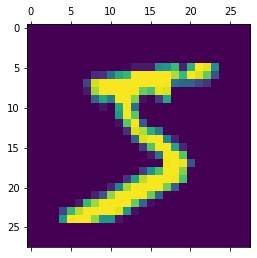

In [ ]:
plt.matshow(x_train[0])

In [ ]:
y_train[0]

5

In [ ]:
#scaling....it is the technique which improves the accuracy of machine learning models
x_train = x_train /255
x_test = x_test /255

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)



In [ ]:
#bulid simple artificial neural network from classificaton 
ann = models.Sequential([
                        layers.Flatten(input_shape=(28,28)),
                        layers.Dense(3000, activation='relu'),
                        layers.Dense(1000, activation='relu'),
                        layers.Dense(10,activation='softmax')

])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.5006 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2518 - accuracy: 0.9291
Epoch 3/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2018 - accuracy: 0.9436
Epoch 4/5
1875/1875 [==============================] - 78s 41ms/step - loss: 0.1692 - accuracy: 0.9522
Epoch 5/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1449 - accuracy: 0.9597


In [ ]:
 #you can see that at the of 5 epochs, accuracy is at around 49%

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes =[np.argmax(element) for element in y_pred]
print("classification report: \n", classification_report(y_test, y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.95      0.96      1010
           4       0.95      0.97      0.96       982
           5       0.96      0.95      0.96       892
           6       0.97      0.96      0.96       958
           7       0.97      0.94      0.95      1028
           8       0.94      0.96      0.95       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



In [ ]:
x_train=x_train.reshape(-1,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test=x_test.reshape(-1,28,28,1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
cnn = models.Sequential([
                         layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu'),
                         layers.MaxPooling2D((2,2)),

                         layers.Flatten(),
                         layers.Dense(20, activation='relu'),
                         layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.8617 - accuracy: 0.7167
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1130 - accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0732 - accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0575 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0492 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0435 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0362 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0319 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0321 - accuracy: 0.9902
Epoch 10/10
1875/1875 [==============================] - 48s 26m

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0498 - accuracy: 0.9862


[0.0498214028775692, 0.9861999750137329]

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[2.84017652e-14, 1.16395398e-07, 8.79323670e-06, 6.63302480e-09,
        1.03325853e-07, 2.73264137e-11, 3.62406091e-17, 9.99990940e-01,
        4.05881474e-11, 6.84946544e-10],
       [4.82041664e-12, 3.89826416e-14, 1.00000000e+00, 7.47310488e-15,
        4.88355467e-10, 9.16438369e-22, 1.74014848e-11, 1.86446106e-12,
        2.01236076e-11, 1.05534212e-12],
       [2.48861880e-15, 1.00000000e+00, 1.39035545e-11, 1.64805428e-23,
        4.61810755e-12, 9.82481258e-17, 3.45276142e-14, 3.89835386e-10,
        1.49835642e-16, 3.06514171e-16],
       [9.99985099e-01, 1.87066401e-15, 7.52265521e-07, 1.61398813e-12,
        5.05901365e-09, 1.57599461e-10, 1.40434868e-05, 6.36785384e-13,
        5.80642237e-08, 8.19267996e-08],
       [4.62962112e-29, 1.40363285e-11, 4.52542341e-17, 5.27261498e-20,
        1.00000000e+00, 2.96977353e-15, 6.26663706e-14, 3.34670493e-17,
        1.72197732e-13, 1.37474795e-10]], dtype=float32)

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)